# 英文词袋模型

In [ ]:
# 导入数据
import pandas as pd
text_ana = pd.read_csv('text_analysis_twitter.csv')
text_ana = text_ana.drop(['Unnamed: 0'], axis=1)

In [2]:
import re

def preprocess_text(text):    
    # 转换为小写
    text = text.lower()   
    # 移除URL
    text = re.sub(r'http\S+', '', text)    
    return text

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text_ana["text"].apply(preprocess_text))

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

词袋特征矩阵的形状: (300000, 121376)
特征词列表: ['00' '000' '0000' ... '투표하십시오' '한국어' 'ﬂees']


In [4]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [5]:
# 观察词袋模型的词频计数结果
sorted (word_freq.items(), key=lambda x: x[1], reverse=True)

[('the', 247160),
 ('to', 235370),
 ('of', 112428),
 ('in', 104912),
 ('and', 104025),
 ('for', 102100),
 ('rt', 83461),
 ('on', 72986),
 ('amp', 65500),
 ('is', 64785),
 ('we', 53564),
 ('our', 49736),
 ('this', 45532),
 ('you', 40235),
 ('with', 39027),
 ('it', 38749),
 ('that', 38161),
 ('qt', 35691),
 ('at', 33821),
 ('are', 31301),
 ('will', 29565),
 ('tax', 28529),
 ('my', 27644),
 ('be', 26920),
 ('from', 26202),
 ('today', 24574),
 ('have', 23005),
 ('by', 22865),
 ('more', 22665),
 ('trump', 19894),
 ('bill', 19534),
 ('their', 19129),
 ('about', 18973),
 ('as', 18391),
 ('all', 18295),
 ('not', 18197),
 ('your', 17615),
 ('who', 17098),
 ('can', 15465),
 ('health', 14215),
 ('has', 14119),
 ('an', 13861),
 ('they', 13858),
 ('us', 13825),
 ('here', 13799),
 ('house', 13680),
 ('people', 13486),
 ('great', 13468),
 ('now', 13113),
 ('families', 12838),
 ('must', 12787),
 ('up', 12602),
 ('was', 12513),
 ('need', 12313),
 ('americans', 12279),
 ('help', 12145),
 ('act', 12064),

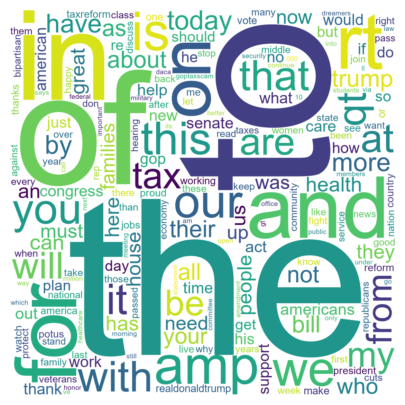

<Figure size 640x480 with 0 Axes>

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

# 根据词袋模型分析结果绘制词云图
wc = WordCloud(
    width=1200, 
    height=1200, 
    background_color='white', 
    font_path='arial.ttf'
).generate_from_frequencies(word_freq)

# 显示词云图
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud_twi.png', dpi=100)

# 中文词袋模型

In [10]:
# 导入数据
import pandas as pd
text_ana = pd.read_csv('text_analysis_weibo.csv', index_col = 0)
# text_ana = text_ana.drop(['Unnamed: 0'], axis=1)
text_ana

,标题/微博内容,点赞,转发,评论,账号昵称UID加密,粉丝数,关注数,地域
0,#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 ​​,0,0,0,a2331b38901d62d2d9a20529177ef3b3,0,22,湖北
1,转发C,0,0,0,d6dc4470f51fce93cc0cbad8abf55a75,0,33,广西
2,【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待...,0,0,0,372bc4782eb442b88035f920a7c1a68e,6,85,广东
3,丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一...,0,0,0,6fe0d482bd3e78a3483e2a1d57f14ef2,75,1012,广东
4,诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！,0,0,0,872380d71d6ee9130e8b49d331f2baa9,0,10,广东
...,...,...,...,...,...,...,...,...
49995,935天气路况早知道 2022年3月2日 星期三 今日限行尾号3和8 8：00分发布 ...,0,0,0,2231ab79796d569625633acafd9f1351,445,74,河南
49996,4月1日起，交通违法记分规则重大调整！ http://t.cn/A66zxfR0 ​​,0,0,0,91c9d380c1cc7811be5ee10ce510d77a,842,54,甘肃
49997,转发C,0,0,1,301771db13798e2dd493c02a44e59444,99,3433,江苏
49998,全体 甘肃车主注意 4月1日起，全面实施！ ...,0,0,0,NaN,0,0,甘肃


In [11]:
# 分析语料
text = list(text_ana['标题/微博内容'])
text

['#高校通报教师图书馆打电话声音过大出言不逊#公道自在人心，谣言自在人心 \u200b\u200b',
 '转发C',
 '【#刘雨昕运动者联濛#河山覆冰雪，健儿迎冬奥[金牌]全能唱跳不设限，运动联濛开新年🇨🇳 期待全能音乐人@刘雨昕 与#运动者联濛#一起，为冬奥赛事助力加油！】',
 '丁程鑫//@丁程鑫后援会官博:#丁程鑫[超话]# ✨#丁程鑫 二十成金筑梦鑫世界# 大年初一锁定@北京卫视 和门面主舞@时代少年团-丁程鑫 一起过大年，拥抱冰雪，致敬冬奥！',
 '诶，你们真不要脸诶。。。没资格宣传奥运。。。抵制抵制！',
 '转发C',
 '#熊猫守护者##全面二创冰墩墩#北京冬奥会如火如荼地进行中，滚滚我的好朋友冰墩墩也十分活跃，看滚滚我做一组舒展运动，为中国健儿加油鼓劲儿！[嘻嘻][嘻嘻] http://t.cn/A6ilerDZ 视频来源：@桃花源生态保护基金会 \u200b\u200b\u200b',
 '转发C',
 '2022北京冬奥会加油！冰墩墩雪容融也非常可爱！期待我国奥运健儿们的精彩表现[开学季]#云支教迎冬奥# \u200b\u200b',
 '和@TFBOYS-易烊千玺 一起助力东奥！一起向未来！',
 '转发C',
 '[心]',
 '守护[心]',
 '#易烊千玺邀你唱响一起向未来# //@M28号星球:#易烊千玺邀你唱响一起向未来# 26.17',
 '//@翔霖神谕:感谢@爱奇艺 的分享。新年胜旧年，春妍惹绚烂，万事胜意与平安喜乐的祝福徒增和乐，@时代少年团-严浩翔 @时代少年团-贺峻霖  同少年关注北京台春晚，拥锦瑟年华岁岁。',
 '好棒[打call][打call][打call]//@只是叭呐呐:哇晒哇晒！厉害我顶起！！！#蔡徐坤代言燕京啤酒# //@蔡徐坤的大喇叭萱:#蔡徐坤[超话]# I#蔡徐坤代言燕京啤酒# 恭喜燕京啤酒，在北京冬奥会官方赞助商冬奥营销传播声量总榜单正式发布位列第三！和代言人@蔡徐坤 一起释放活力，点燃激情，喝彩冬奥！[干杯]',
 '转发C',
 '//@杰克涛:金牌稳了[笑而不语]',
 '转发C',
 '//@许佳琪kiki:#一起冬奥吧# 中国队加油呀⛽️',
 '转发C',
 '蹲',
 '转发',
 '#周深一起向未来高音太绝了#@卡布叻_周深 录制《一起向未来》花絮来了！这漂亮的高音简直绝绝

In [26]:
import jieba

def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

text_ana['标题/微博内容'] = text_ana['标题/微博内容'].iloc[:100]\
                                .astype(str).apply(word_segmentation)
text_ana['标题/微博内容'].head()

0    #       高校       通报       教师       图书馆       打...
1                                           转发       C
2    【       #       刘雨昕       运动       者       联  ...
3    丁程鑫       /       /       @       丁程鑫       后援...
4    诶       ，       你们       真       不要脸       诶  ...
Name: 标题/微博内容, dtype: object

In [27]:
text = list(text_ana['标题/微博内容'].dropna())
text

['#       高校       通报       教师       图书馆       打电话       声音       过大       出言不逊       #       公道       自       在       人心       ，       谣言       自       在       人心               \u200b       \u200b',
 '转发       C',
 '【       #       刘雨昕       运动       者       联       濛       #       河山       覆       冰雪       ，       健儿       迎       冬奥       [       金牌       ]       全能       唱       跳       不       设限       ，       运动       联       濛       开       新年       🇨       🇳               期待       全能       音乐       人       @       刘雨昕               与       #       运动       者       联       濛       #       一起       ，       为       冬奥       赛事       助力       加油       ！       】',
 '丁程鑫       /       /       @       丁程鑫       后援会       官博       :       #       丁程鑫       [       超话       ]       #               ✨       #       丁程鑫               二十       成金筑梦鑫       世界       #               大年初一       锁定       @       北京       卫视               和       门面       主舞       @       时代       少年       团     

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (100, 599)


In [29]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['0414' '1020' '167' '17' '18' '19' '2022' '25' '26' '50' 'a669n33f'
 'a66hqzun' 'a66v9mln' 'a6i5bc1o' 'a6ierqv2' 'a6igrcur' 'a6ikvewj'
 'a6ikxrlc' 'a6ilerdz' 'a6ipxoe0' 'a6jy3xv2' 'a6mn51qh' 'a6xwbtdu' 'an35'
 'c2021' 'call' 'cn' 'cosmo' 'cosmo5' 'cup' 'heytea' 'http' 'into1' 'kiki'
 'liveshow' 'lm' 'm28' 'mv' 'rap' 'tfboys' 'to19' 'um' 'vocal' 'wzy'
 'yyds' '一个' '一休' '一天' '一定' '一封' '一届' '一张' '一日' '一片' '一种' '一组' '一起' '一辈子'
 '丁哥' '丁程鑫' '万事' '万里' '三珩' '不仅' '不停' '不是' '不畏' '不要' '不要脸' '不语' '世界' '东奥'
 '东方' '东西' '东进' '严浩翔' '中华' '中国' '中国画' '中国队' '中央美术学院' '丰富多彩' '主舞' '之后' '之火'
 '之约' '之美' '了解' '二十' '产生' '京东' '人心' '人生' '什么' '他们' '代入' '代表团' '代言' '代言人'
 '以此' '休息' '优秀' '会长' '传播' '位列' '位送' '低沉' '你们' '你好' '便是' '保护' '信号' '健儿'
 '兄弟' '全能' '全面' '公道' '六个' '共祝' '关心' '关注' '关键' '其中' '养乐多' '兼好' '再说' '写下'
 '冠军' '冬天' '冬奥' '冬奥会' '冬季' '冬日' '冬梦之约' '冰墩' '冰壶' '冰雪' '准时' '凝聚' '出演'
 '出言不逊' '分享' '刘耀文' '刘雨昕' '刚刚开始' '创冰墩' '前辈' '加油' '加盟' '助力' '助威' '助阵' '努力'
 '劲儿' '勇士' '北京' '十八' '十八岁' '十六个' '十分' '十大' '千玺' '单人滑' '单届' 

In [30]:
list(X.toarray())

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [31]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [32]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

599

In [33]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('转发', 33),
 ('冬奥', 30),
 ('一起', 29),
 ('北京', 25),
 ('刘雨昕', 20),
 ('运动', 18),
 ('加油', 17),
 ('少年', 14),
 ('cn', 13),
 ('http', 13),
 ('冬奥会', 12),
 ('未来', 12),
 ('冰雪', 11),
 ('健儿', 10),
 ('宋亚轩', 10),
 ('时代', 10),
 ('call', 9),
 ('期待', 8),
 ('中国', 7),
 ('全能', 6),
 ('分享', 6),
 ('徐坤', 6),
 ('我们', 6),
 ('超话', 6),
 ('into1', 5),
 ('丁程鑫', 5),
 ('冰墩', 5),
 ('努力', 5),
 ('周深', 5),
 ('感谢', 5),
 ('林墨', 5),
 ('真的', 5),
 ('自己', 5),
 ('金牌', 5),
 ('音乐', 5),
 ('关注', 4),
 ('助力', 4),
 ('卫视', 4),
 ('后援会', 4),
 ('唱响', 4),
 ('尹浩宇', 4),
 ('新年', 4),
 ('春晚', 4),
 ('朱一龙', 4),
 ('李宇春', 4),
 ('歌手', 4),
 ('温柔', 4),
 ('致敬', 4),
 ('赛场', 4),
 ('19', 3),
 ('一定', 3),
 ('不是', 3),
 ('千玺', 3),
 ('卡布', 3),
 ('可以', 3),
 ('声音', 3),
 ('奥运健儿', 3),
 ('官方', 3),
 ('害羞', 3),
 ('张哥', 3),
 ('日常', 3),
 ('时间', 3),
 ('明星', 3),
 ('涵江', 3),
 ('照亮', 3),
 ('照顾', 3),
 ('燕京啤酒', 3),
 ('生日', 3),
 ('直播', 3),
 ('相信', 3),
 ('相约', 3),
 ('祝福', 3),
 ('罗一舟', 3),
 ('视频', 3),
 ('觉得', 3),
 ('赛事', 3),
 ('越来越', 3),
 ('进行', 3),
 ('一个', 2),
 ('一辈子', 2),
 (

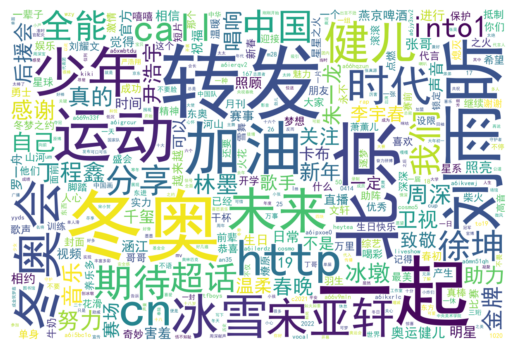

In [36]:
# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='simhei.ttf',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=400,  # 设置最大显示的词数
    max_font_size=200  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 个人数据分析

In [41]:
# 导入数据
import pandas as pd
file_path = '九阳豆浆纯文本.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()
content

'原本的原汁原味，就它就是就跟那种鲜榨豆浆喝起来口感是一样的，它没有科技，没有狠活的，就喝起来是浓浓的豆腐那种香味在里面的。 1 号链接，我们给大家，今天花一份钱能够补充三份营养价值。黄豆、黑豆有机的，像黄豆一些孕妈妈你需要补充孕什么什么酮的，还有一些宝宝总是久坐不运动的，再加上瓜果蔬菜吃的少，多喝黄豆，黄豆是高膳食纤维的，对皮肤好，对身体好啊。是熬夜的头发，离家出走，多喝黑豆，黑豆是高蛋白质，含有丰富的花青素的成分在里面的。对熬夜好，对头发好，咱们搭配着去喝，都可以选我们家 1 号链接。\n\n是的\n\n平时来买 149 也只有 39 小条。但是您现在 30 秒钟拍下1号链接回来扣已拍，多登记两条，别人到手39条，您到手 41 小条，这两条去试喝，去感受，喝了这两条，您但凡觉得不喜欢、不合适都可以直接退。\n\n直接退的\n\n我们是官方直播间，有 300 多万粉丝安心购运费险都会有。\n\n对的。\n\n好喝你再拆正装，而且这个时候我们基本上很多朋友都会慢慢在回购，因为它真很好喝。\n\n3 周岁老人小孩都可以放心去喝的，都可以选我们家一号链接的。而且除了这个杯子以外，现在拍下还能再送一个全新升级版本的电动搅拌杯，是 3.0 版本，不是 2.0 版本， 2.0 版本是外面采购，它不是九阳的，相对来说肯定没有 3.0 版好用。那九阳又是做小家电起家，那么对不对？做杯子你可以放心，大品牌有保障，给大家一个月质保，收到货是坏的用不了的，一个月之内联系客服，然后给你换个新的就可以了啊。\n\n是的。\n\n搅拌杯怎么用，教一下大家。拿回去先放水，然后按钮这个位置一按，然后再把粉放进去，它就可以搅拌开 ，3 秒闪电速溶任何的豆浆粉、咖啡粉、奶茶粉、羽衣甘蓝粉都可以搅拌开。因为搅拌棍做到了边缘加宽，升级的锯齿砂的搅拌棍，任何的粉末状都可以搅拌开，就很方便很省时省力的。它还有带保温功能的 3- 4 个小时，你平时喝不完就把杯盖盖上去，防灰防尘，还能够加长保温时长，都可以选我们家 1 号链接。\n\n还剩最后两单了！\n\n最后两单只有两单的，主播加不了单，补不了单，前两个拍下一号链接，有！后面拍下就没有了。豆浆全部都是新鲜日期，保质期一整年。\n\n一整年！\n\n今天打包，明天发货，杭州、山东、武汉三个仓库是就近给你安排，哪个仓库离你近，仓库就近安排，但是如果说你犹豫了，

In [44]:
import jieba
import pandas as pd

# 定义分词函数
def word_segmentation(text):
    words = jieba.lcut(text)
    return ' '.join(words)

# 将读取的文本内容创建为DataFrame
df = pd.DataFrame({'text': [content]})

# 应用分词函数到DataFrame的'text'列
df['text_segmented'] = df['text'].apply(word_segmentation)

# 查看分词后的数据
print(df['text_segmented'])

0    原本 的 原汁原味 ， 就 它 就是 就 跟 那种 鲜榨 豆浆 喝 起来 口感 是 一样 的...
Name: text_segmented, dtype: object


In [45]:
text = list(df['text_segmented'].dropna())
text

['原本 的 原汁原味 ， 就 它 就是 就 跟 那种 鲜榨 豆浆 喝 起来 口感 是 一样 的 ， 它 没有 科技 ， 没有 狠活 的 ， 就 喝 起来 是 浓浓的 豆腐 那种 香味 在 里面 的 。   1   号 链接 ， 我们 给 大家 ， 今天 花 一份 钱 能够 补充 三份 营养价值 。 黄豆 、 黑豆 有机 的 ， 像 黄豆 一些 孕 妈妈 你 需要 补充 孕 什么 什么 酮 的 ， 还有 一些 宝宝 总是 久坐 不 运动 的 ， 再 加上 瓜果 蔬菜 吃 的 少 ， 多 喝 黄豆 ， 黄豆 是 高 膳食 纤维 的 ， 对 皮肤 好 ， 对 身体 好 啊 。 是 熬夜 的 头发 ， 离家出走 ， 多 喝 黑豆 ， 黑豆 是 高 蛋白质 ， 含有 丰富 的 花青素 的 成分 在 里面 的 。 对 熬夜 好 ， 对 头发 好 ， 咱们 搭配着 去 喝 ， 都 可以 选 我们 家   1   号 链接 。 \n \n 是 的 \n \n 平时 来 买   149   也 只有   39   小条 。 但是 您 现在   30   秒钟 拍下 1 号 链接 回来 扣 已 拍 ， 多 登记 两条 ， 别人 到手 39 条 ， 您 到手   41   小条 ， 这 两条 去试 喝 ， 去 感受 ， 喝 了 这 两条 ， 您 但凡 觉得 不 喜欢 、 不 合适 都 可以 直接 退 。 \n \n 直接 退 的 \n \n 我们 是 官方 直播间 ， 有   300   多万 粉丝 安心 购 运费 险 都 会 有 。 \n \n 对 的 。 \n \n 好喝 你 再 拆 正装 ， 而且 这个 时候 我们 基本上 很多 朋友 都 会 慢慢 在 回购 ， 因为 它 真 很 好喝 。 \n \n 3   周岁 老人 小孩 都 可以 放心 去 喝 的 ， 都 可以 选 我们 家 一号 链接 的 。 而且 除了 这个 杯子 以外 ， 现在 拍下 还 能 再 送 一个 全新 升级 版本 的 电动 搅拌 杯 ， 是   3.0   版本 ， 不是   2.0   版本 ，   2.0   版本 是 外面 采购 ， 它 不是 九阳 的 ， 相对来说 肯定 没有   3.0   版好 用 。 那 九阳 又 是 做 小家电 起家 ， 那么 对 不 对 ？ 做 杯子 你 可以 放心 ， 大

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 将文本数据转换为词袋特征矩阵
X = vectorizer.fit_transform(text)

# 展示特征矩阵的形状
print('词袋特征矩阵的形状:', X.shape)

词袋特征矩阵的形状: (1, 736)


In [47]:
# 展示词袋模型中的所有特征词
print('特征词列表:', vectorizer.get_feature_names_out())

特征词列表: ['10' '100' '11' '12' '14' '140' '149' '15' '20' '29' '30' '300' '304'
 '380' '39' '40' '400' '41' '54321' '60' '79' '820' '85' '99' 'id' 'l2'
 'pp' '一下' '一个' '一个月' '一些' '一份' '一会' '一充' '一分' '一包' '一单' '一号' '一天' '一定'
 '一小' '一年四季' '一旦' '一条' '一杯' '一样' '一款' '一波' '一点点' '一直' '三个' '三五个' '三五天'
 '三份' '三单' '三年' '三种' '上去' '上岗' '下单' '下方' '下来' '不了' '不会' '不到' '不卖' '不够'
 '不好意思' '不是' '不甜' '不用' '不管' '不能' '不要' '不让' '不论' '不起' '不送' '不锈钢' '不高' '专业'
 '东北' '东西' '丝滑' '两个' '两位数' '两单' '两条' '两用' '两节' '两袋' '个人' '个点' '丰富' '主播'
 '主播加' '乃至于' '久坐' '之内' '之前' '之后' '之宝' '九阳' '也好' '买不到' '了解' '二三十' '二号' '二次'
 '五分' '五年' '产品' '人家' '人工' '人生' '什么' '今天' '今年年底' '从来' '仓库' '付款' '付钱' '以上'
 '以下' '以后' '以外' '价格' '任何' '伊能静' '估计' '但凡' '但是' '位置' '体重' '体验' '你们' '你别'
 '你家' '保养' '保冰' '保冷' '保温' '保温杯' '保热' '保留' '保质期' '保障' '倒扣' '倒水' '倒计时' '倒进去'
 '做到' '充个' '充电' '先到' '先去' '先喝' '先得' '先放粉' '先教' '免费' '免费送' '兔子' '入手' '全场'
 '全新' '全脂' '全部' '全部都是' '公屏' '关注' '关注点' '其中' '其他' '内胆' '内里' '再教' '冬天' '冰水'
 '冲剂' '冲泡' '冲着' '冷水' '减价' '减量' '几个' '几千个' '几单' '

In [48]:
# 获取词汇表
feature_words = vectorizer.get_feature_names_out()

# 计算词频统计
word_freq = dict(zip(feature_words, X.sum(axis=0).A1))

In [49]:
# 词袋模型中不重复的词汇的数量
len(word_freq)

736

In [50]:
# 观察词袋模型的词频计数结果
sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

[('链接', 142),
 ('没有', 75),
 ('可以', 63),
 ('搅拌', 63),
 ('杯子', 53),
 ('豆浆', 53),
 ('大家', 45),
 ('版本', 45),
 ('宝贝', 43),
 ('宝宝', 42),
 ('一下', 39),
 ('这个', 38),
 ('你们', 37),
 ('我们', 36),
 ('关注', 35),
 ('只有', 35),
 ('能够', 34),
 ('直接', 30),
 ('小条', 29),
 ('只要', 28),
 ('登记', 28),
 ('黄豆', 27),
 ('到手', 26),
 ('九阳', 25),
 ('库存', 25),
 ('两条', 23),
 ('什么', 22),
 ('因为', 22),
 ('电动', 22),
 ('今天', 21),
 ('怎么', 21),
 ('不用', 20),
 ('而且', 20),
 ('还有', 20),
 ('黑豆', 20),
 ('不了', 19),
 ('升级', 19),
 ('担心', 19),
 ('最后', 19),
 ('39', 18),
 ('41', 18),
 ('一个', 18),
 ('新字', 18),
 ('直播间', 18),
 ('一包', 17),
 ('但是', 17),
 ('保温', 16),
 ('好喝', 16),
 ('尝鲜', 16),
 ('就是', 16),
 ('全部', 15),
 ('里面', 15),
 ('全部都是', 14),
 ('新粉', 14),
 ('然后', 14),
 ('秒钟', 14),
 ('领取', 14),
 ('平时', 13),
 ('放心', 13),
 ('明天', 13),
 ('更加', 13),
 ('精准', 13),
 ('系统', 13),
 ('多少', 12),
 ('不会', 11),
 ('仓库', 11),
 ('后面', 11),
 ('是不是', 11),
 ('现在', 11),
 ('自己', 11),
 ('需要', 11),
 ('12', 10),
 ('15', 10),
 ('两个', 10),
 ('全场', 10),
 ('出来', 10),
 ('刷新',

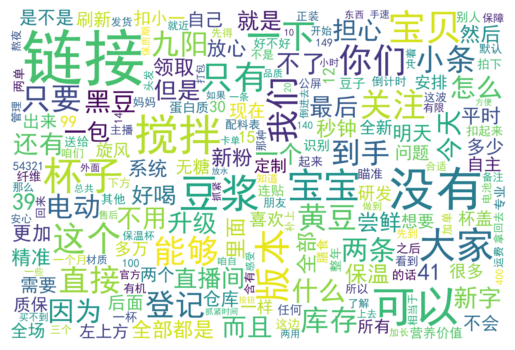

In [52]:
# 根据词袋模型分析结果绘制词云图
wordcloud = WordCloud(
    font_path='simhei.ttf',  # 指定中文字体文件路径
    background_color='white',  # 设置背景颜色
    width=1200,
    height=800,
    max_words=200,  # 设置最大显示的词数
    max_font_size=150  # 设置字体最大值
).generate_from_frequencies(word_freq)

# 显示词云图
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()